In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

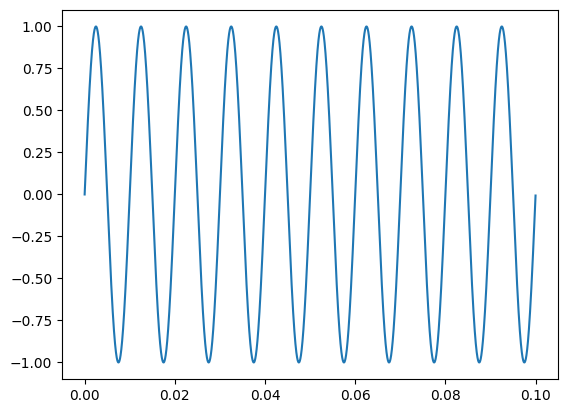

In [69]:
t=np.arange(0,0.1,0.00001)
# message=sawtooth(2*np.pi*100*t)
message=np.sin(2*np.pi*100*t)
plt.plot(t,message)
plt.show()

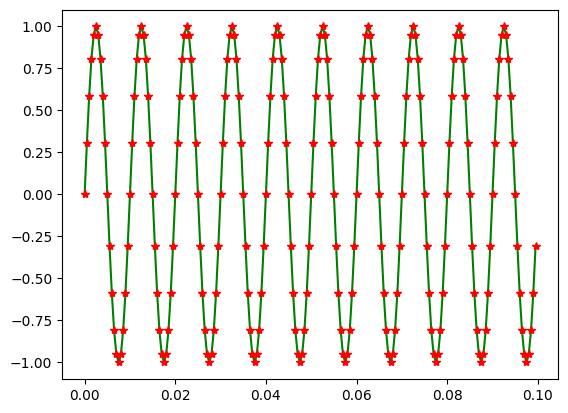

In [70]:
ts=np.arange(0,0.1,1/(2*1000))
# message=sawtooth(2*np.pi*100*ts)
message=np.sin(2*np.pi*100*ts)
plt.plot(ts,message,"g",ts,message,"r*")
plt.show()

In [76]:
L=int(input("enter the quantization level:"))
tq=np.linspace(round(min(message)),round(max(message)),L)
print(tq)

[-1.         -0.86666667 -0.73333333 -0.6        -0.46666667 -0.33333333
 -0.2        -0.06666667  0.06666667  0.2         0.33333333  0.46666667
  0.6         0.73333333  0.86666667  1.        ]


In [78]:
q_sig=[min(tq,key=lambda x: abs(x-s)) for s in message]
print(q_sig)
print(len(q_sig))

[-0.06666666666666665, 0.33333333333333326, 0.6000000000000001, 0.8666666666666667, 1.0, 1.0, 1.0, 0.8666666666666667, 0.6000000000000001, 0.33333333333333326, 0.06666666666666665, -0.33333333333333337, -0.6, -0.8666666666666667, -1.0, -1.0, -1.0, -0.8666666666666667, -0.6, -0.33333333333333337, -0.06666666666666665, 0.33333333333333326, 0.6000000000000001, 0.8666666666666667, 1.0, 1.0, 1.0, 0.8666666666666667, 0.6000000000000001, 0.33333333333333326, 0.06666666666666665, -0.33333333333333337, -0.6, -0.8666666666666667, -1.0, -1.0, -1.0, -0.8666666666666667, -0.6, -0.33333333333333337, -0.06666666666666665, 0.33333333333333326, 0.6000000000000001, 0.8666666666666667, 1.0, 1.0, 1.0, 0.8666666666666667, 0.6000000000000001, 0.33333333333333326, -0.06666666666666665, -0.33333333333333337, -0.6, -0.8666666666666667, -1.0, -1.0, -1.0, -0.8666666666666667, -0.6, -0.33333333333333337, -0.06666666666666665, 0.33333333333333326, 0.6000000000000001, 0.8666666666666667, 1.0, 1.0, 1.0, 0.8666666666

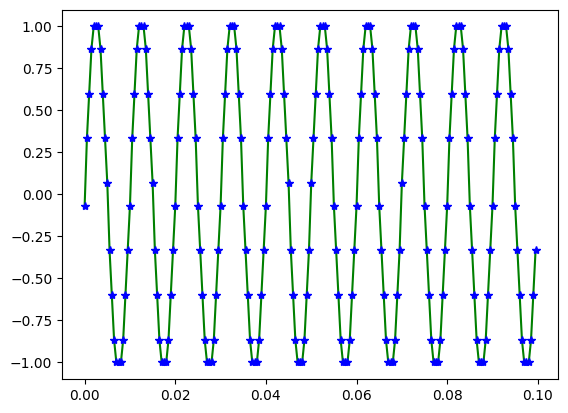

In [79]:
plt.plot(ts,q_sig,"g",ts,q_sig,"b*")

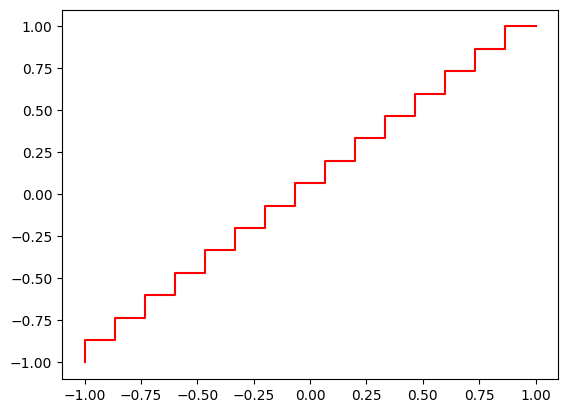

In [80]:
levels=[min(tq,key=lambda x: abs(x-s)) for s in tq]
plt.step(tq,levels,"r")

In [81]:
bit=int(np.log2(L))
binary={levels:format(i,f'0{bit}b') for i,levels in enumerate(tq)}
print(binary)

{-1.0: '0000', -0.8666666666666667: '0001', -0.7333333333333334: '0010', -0.6: '0011', -0.4666666666666667: '0100', -0.33333333333333337: '0101', -0.19999999999999996: '0110', -0.06666666666666665: '0111', 0.06666666666666665: '1000', 0.19999999999999996: '1001', 0.33333333333333326: '1010', 0.46666666666666656: '1011', 0.6000000000000001: '1100', 0.7333333333333334: '1101', 0.8666666666666667: '1110', 1.0: '1111'}


In [82]:
encoded_message=[]
for i in q_sig:
    encoded_message.append(binary[i])
print(encoded_message)

['0111', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '1000', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '0111', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '1000', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '0111', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '0111', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '0111', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '0111', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '0111', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '1000', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '1000', '1010', '1100', '1110', '1111', '1111', '1111', '1110', '1100', '1010', '0111', '0101', '0011', '0001', '0000', '0000', '0000', '0001', '0011', '0101', '0111', '1010', '1100', '1110', '1111',

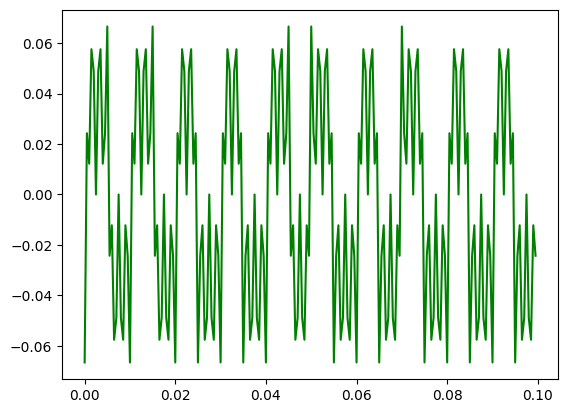

In [83]:
noise=np.array(q_sig)-np.array(message)
plt.plot(ts,noise,"g")

In [85]:
power=lambda x:np.mean(np.square(x))
snr=power(message)/power(noise)
snr_db=20*np.log10(snr)
print(snr_db)

49.186748767723394
